In [ ]:
# Instalando a blibioteca
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00


In [ ]:
# Importando as Blibiotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Argentina.csv'
serie_arg = pd.read_csv(url)
serie_arg.drop('Unnamed: 0',axis=1,inplace=True)
serie_arg.head()

,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


In [ ]:
serie_arg = serie_arg[['Date','Deaths']]
serie_arg.columns = ['ds','y']
serie_arg.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
treino = serie_arg[0:679]
teste = serie_arg[679:710]

In [ ]:
modelo = NeuralProphet(seasonality_mode='multiplicative', num_hidden_layers=10, 
                       d_hidden=10, learning_rate=0.2, batch_size=20, epochs=20,n_forecasts=25,ar_reg=1,
                       )
                       # daily_seasonality=False)
#modelo.highlight_nth_step_ahead_of_each_forecast(4)

In [ ]:
metrics = modelo.fit(treino, freq='H') 

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override 

Training: 0it [00:00, ?it/s]

In [ ]:
future = modelo.make_future_dataframe(treino, periods=len(teste))
forecast = modelo.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined fre

Predicting: 34it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


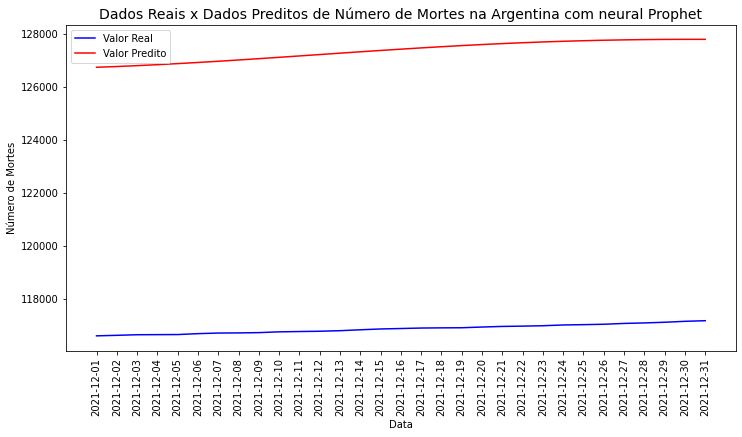

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Dados Reais x Dados Preditos de Número de Mortes na Argentina com neural Prophet',
          fontsize=14)
plt.plot(teste.ds,teste.y,color='blue',label='Valor Real')
plt.plot(teste.ds,forecast.yhat1,color='red',label='Valor Predito')
plt.xticks(rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.legend();

In [ ]:
print('MAPE:',mean_absolute_percentage_error(teste.y,forecast.yhat1))
print('MAE:',mean_absolute_error(teste.y,forecast.yhat1))
print('RMSE:',np.sqrt(mean_squared_error(teste.y,forecast.yhat1)))

MAPE: 0.0898663578571028
MAE: 10502.256552419354
RMSE: 10504.160139600117
